## Feedback Cell:

**Grade: 98/100**

## Feedback Cell:

* Please re-name Jupyter Notebook file as in assignment instructions.
* -2 points

# Homework 3: k-NN, measuring errors

DATA 202 - Fall 2019 - Calvin University

Based on Harvard-CS109a-FA18 lec4 prep

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# New imports this time:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model


In [2]:
# This data file is downloaded from http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
df_adv = pd.read_csv('data/Advertising.csv', index_col=0)

In [3]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df_adv.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [5]:
all_x_values = df_adv['TV'].values
all_y_values = df_adv['sales'].values

In [6]:
# sklearn predictors want to see 2d arrays,
# with each row being an observation
# and each column a predictor.
# Since we only grabbed out a single column,
# the array is just a 1d array.
all_x_values.shape

(200,)

In [7]:
# In NumPy there is a difference between a 1D array (like a vector) and a 2D array (like a matrix)
# To make a 1d array into a 2d array,
# we add a new "axis".
# Convince yourself why the new axis needs to be the second one.
all_x_values = all_x_values[:, np.newaxis]

# Now we have an array of observations by predictors.
all_x_values.shape

(200, 1)

# Nearest Neighbors on Small Subset

*Instructions*: Use observations 5 through 13. Fit a 1-NN model predicting the `sales` response from only the `TV` predictor. Plot both the data points and the mdel predictions.

In [8]:
data_x = all_x_values[5:13]
data_y = all_y_values[5:13]

# define the points where we're going to evaluate the model (asking it for predictions)
x = np.linspace(start=0, stop=300, num=500)
# Again we need to make this into a 2d array.
x = x[:, np.newaxis]

Text(0.5,1,'model, k=1')

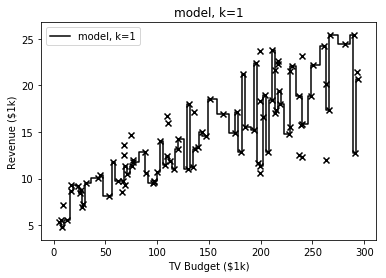

In [16]:
# Warm-up: plot 1-NN
n_neighbors = 1
knn = KNeighborsRegressor(n_neighbors)
knn.fit(data_x, data_y)
y_hat = knn.predict(x)
plt.plot(x, y_hat, label=f"model, k={n_neighbors}", color='black', drawstyle="steps-mid")
plt.legend()
plt.scatter(data_x, data_y, color='black', marker='x', label='data')
plt.xlabel("TV Budget ($1k)")
plt.ylabel("Revenue ($1k)")
plt.title(f"model, k={n_neighbors}")

Now plot k=1 and k=5 side by side.

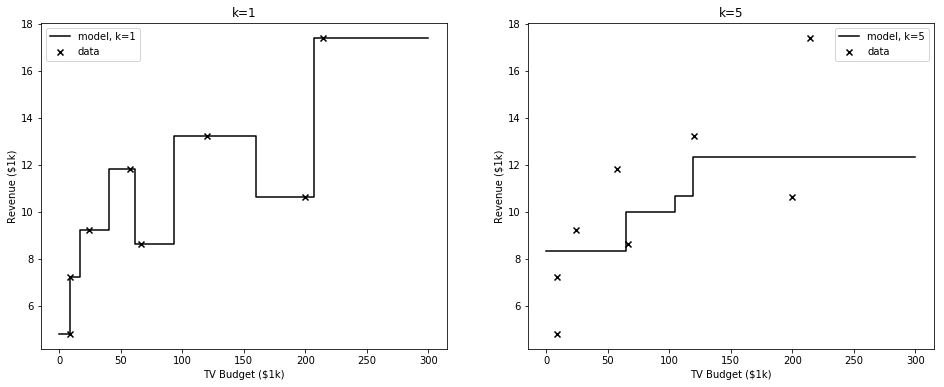

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

for ax, n_neighbors in zip(axs, [1, 5]):
    ax.scatter(data_x, data_y, marker='x', color='black', label='data')
    
    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(data_x, data_y)
    y_hat = knn.predict(x)
    ax.plot(x, y_hat, label=f"model, k={n_neighbors}", color='black', drawstyle="steps-mid")
    ax.legend()
    ax.set_xlabel("TV Budget ($1k)")
    ax.set_ylabel("Revenue ($1k)")
    ax.set_title(f"k={n_neighbors}")

# Larger Dataset

*Instructions*: Make the same plots as above, but using the first 100 observations, and k=1, 10, and 100.

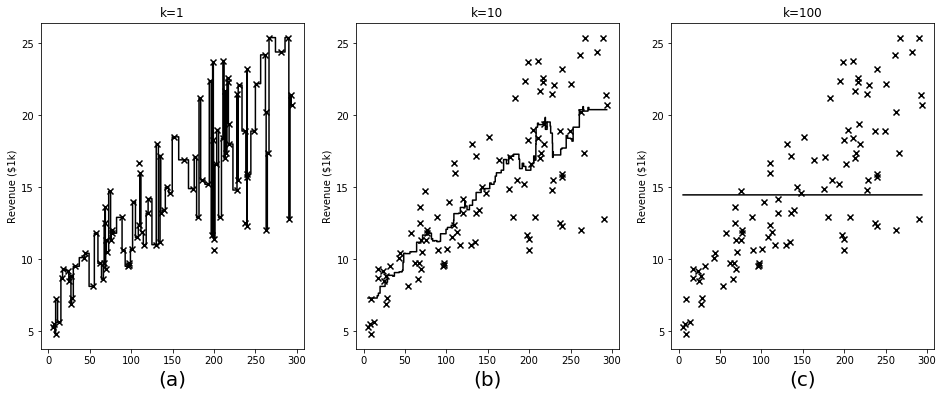

In [11]:
data_x = all_x_values[:100]
data_y = all_y_values[:100]
x = np.linspace(data_x.min(), data_x.max(), 1000)[:, None]
fig, axs = plt.subplots(ncols=3, figsize=(16, 6))
for ax, n_neighbors, label in zip(axs, [1, 10, 100], 'abc'):
    ax.scatter(data_x, data_y, marker='x', color='black', label='data')
    
    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(data_x, data_y)
    y_hat = knn.predict(x)
    ax.plot(x, y_hat, label=f"model, k={n_neighbors}", color='black', drawstyle="steps-mid")
    ax.set_xlabel("TV Budget ($1k)")
    ax.set_ylabel("Revenue ($1k)")
    ax.set_title(f"k={n_neighbors}")
    ax.set_xlabel(f'({label})', fontsize=20)

# Evaluate error on test set

Evaluate and plot the MSE on the training set for k=(1, 2, 3, 4, 5).

In [12]:
# Collect data
train_x = all_x_values[:100]
train_y = all_y_values[:100]
training_mses = []
n_neighbors_vals = [1, 2, 3, 4, 5]
for n_neighbors in n_neighbors_vals:
    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(train_x, train_y)
    y_hat = knn.predict(train_x)
    residuals = train_y - y_hat
    mse = np.mean(residuals ** 2)
    training_mses.append(mse)

Text(0,0.5,'Mean squared error')

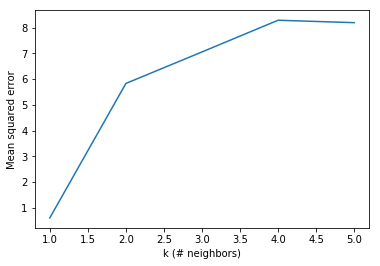

In [13]:
# Plot data (it's always a good idea to separate out these two steps :) )
plt.plot(n_neighbors_vals, training_mses, label="Training Set")
plt.xlabel("k (# neighbors)")
plt.ylabel("Mean squared error")

Use the other 100 observations as a test set. Evaluate the MSE on the test set, for the same k values. Plot both the training and test error.

In [14]:
# Collect data
test_x = all_x_values[100:]
test_y = all_y_values[100:]
x = np.linspace(data_x.min(), data_x.max(), 100)[:, None]
test_mses = []
n_neighbors_vals = [1, 2, 3, 4, 5]
for n_neighbors in n_neighbors_vals:
    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(train_x, train_y)
    y_hat = knn.predict(test_x)
    residuals = test_y - y_hat
    mse = np.mean(residuals ** 2)
    test_mses.append(mse)

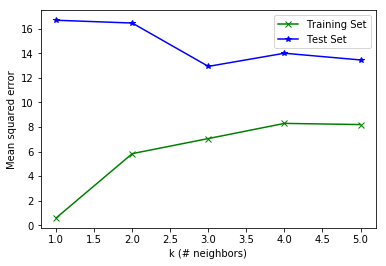

In [17]:
# plot data
plt.plot(n_neighbors_vals, training_mses, color='green', marker="x", label="Training Set")
plt.xlabel("k (# neighbors)")
plt.ylabel("Mean squared error")
plt.plot(n_neighbors_vals, test_mses, color='blue', marker="*", label="Test Set")
plt.legend()

We notice that:

* The training set error is lower than the test set error but doesn't reach zero because ...
* As k increases, the training set error increases
* As k increases, the test set error generally decreases
* This makes sense because as k increases, the predictions are more generalized (they don't fit the training data as well, but they fit new data better)

# Clean-Room Pledge

By writing my name below, I pledge that I followed the Clean-Room Rules stated on the Moodle assignment.

**Name**: Catherine DeJager